# Introduction

Understanding why employees leave and what drives their performance is crucial for any organization. In this project, we explore employee data to find patterns and insights that can help predict both attrition and performance. Using tools like Pandas, Matplotlib, Scikit-learn, and TensorFlow, we clean the data, analyze trends, and build models that can guide better HR decisions. Our aim is to turn raw data into meaningful actions that support employee growth and retention.

Libraries Used: 


Pandas – For reading and cleaning the dataset, and performing data manipulation.

NumPy – For handling numerical operations and arrays efficiently.

Matplotlib & Seaborn – For visualizing data trends, correlations, and patterns.

Scikit-learn – To build and evaluate machine learning models for classification and regression tasks.

TensorFlow / Keras – For creating and training deep learning models to predict performance and attrition.

# Phase 1 - Data Collection and Exploratory Data Analysis (EDA)


Step 1 - Data Collection and Preprocessing

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
#handling missing and duplicate values
df = df.dropna()
df = df.drop_duplicates()

In [7]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

Step 2 - Exploratory Data Analysis (EDA)

In [12]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [13]:
df['Department'] = df['Department'].map({'Sales':0, 'Research & Development':1, 'Human Resources':2})

In [14]:
#Descriptive statistics
df.describe()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,0.739456,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,0.527792,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,0.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,1.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,1.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,2.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

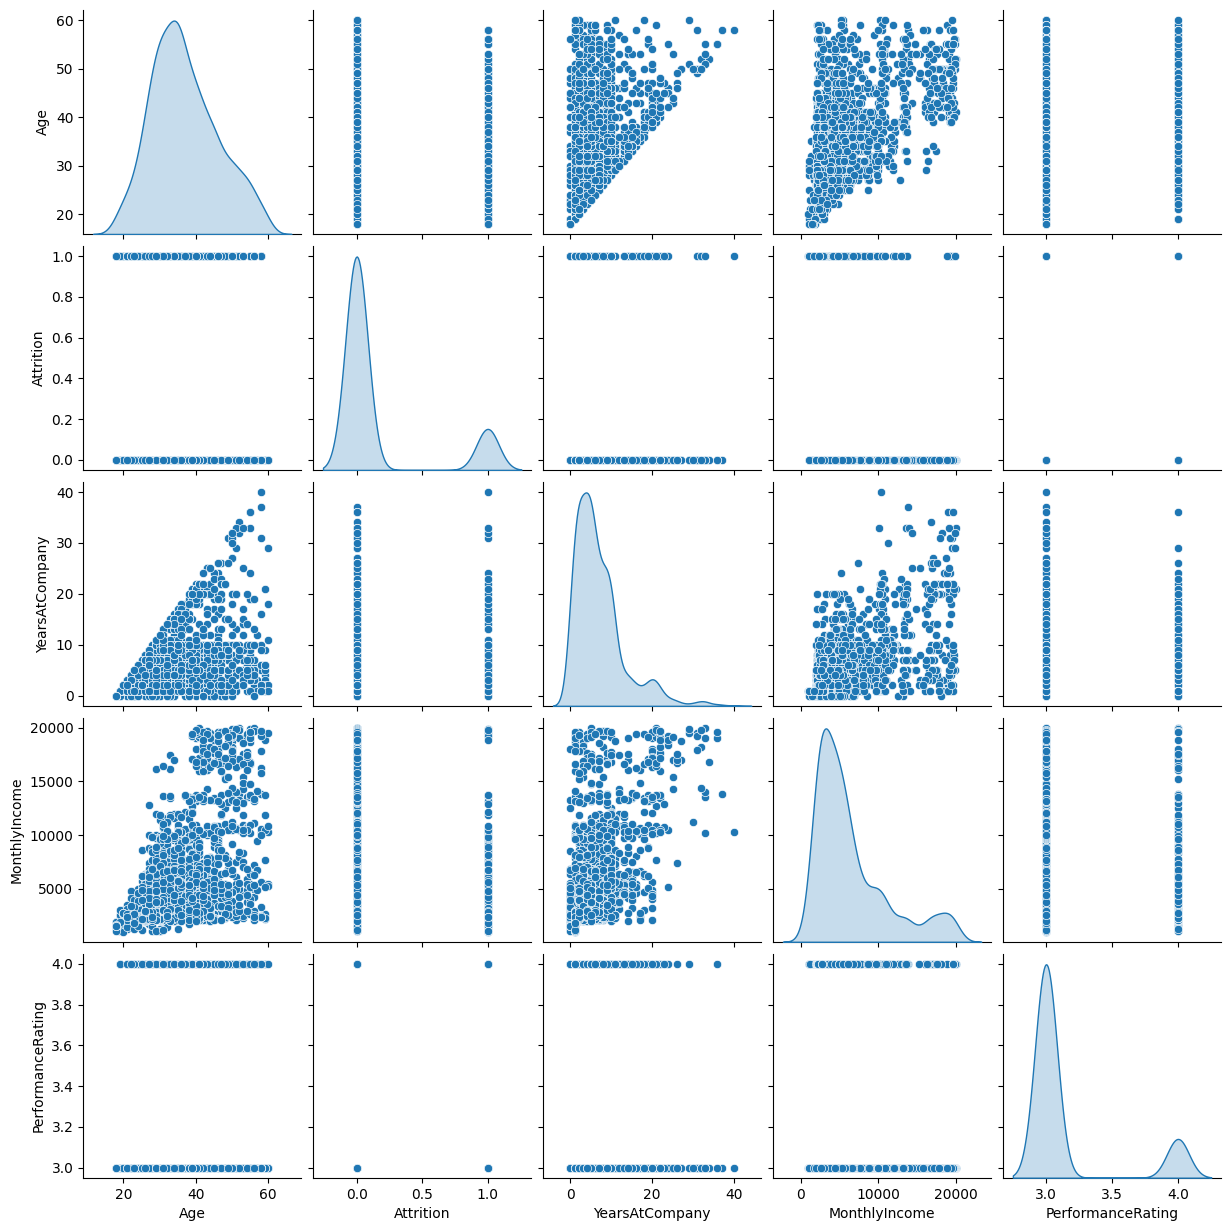

In [15]:
#paiplot 
sns.pairplot(df[['Age','Attrition','YearsAtCompany','MonthlyIncome','PerformanceRating']],diag_kind ='kde')

In [16]:
#Correlation heatmap
corr = (df[['Age','Attrition','YearsAtCompany','MonthlyIncome','PerformanceRating']]).corr()

<Axes: >

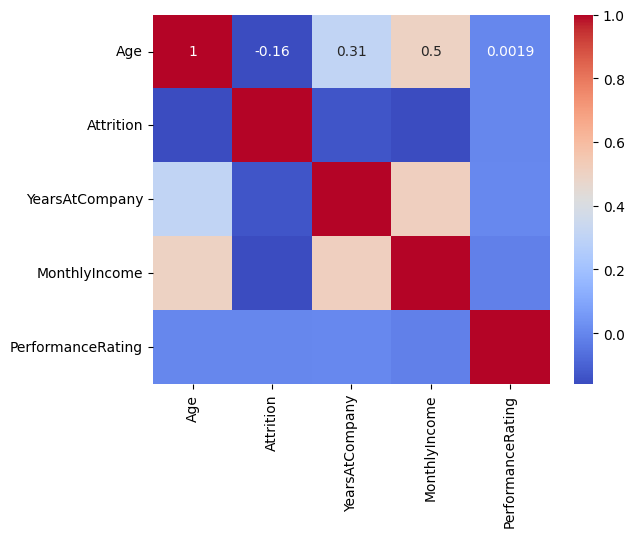

In [17]:
sns.heatmap(corr,annot=True,cmap='coolwarm')

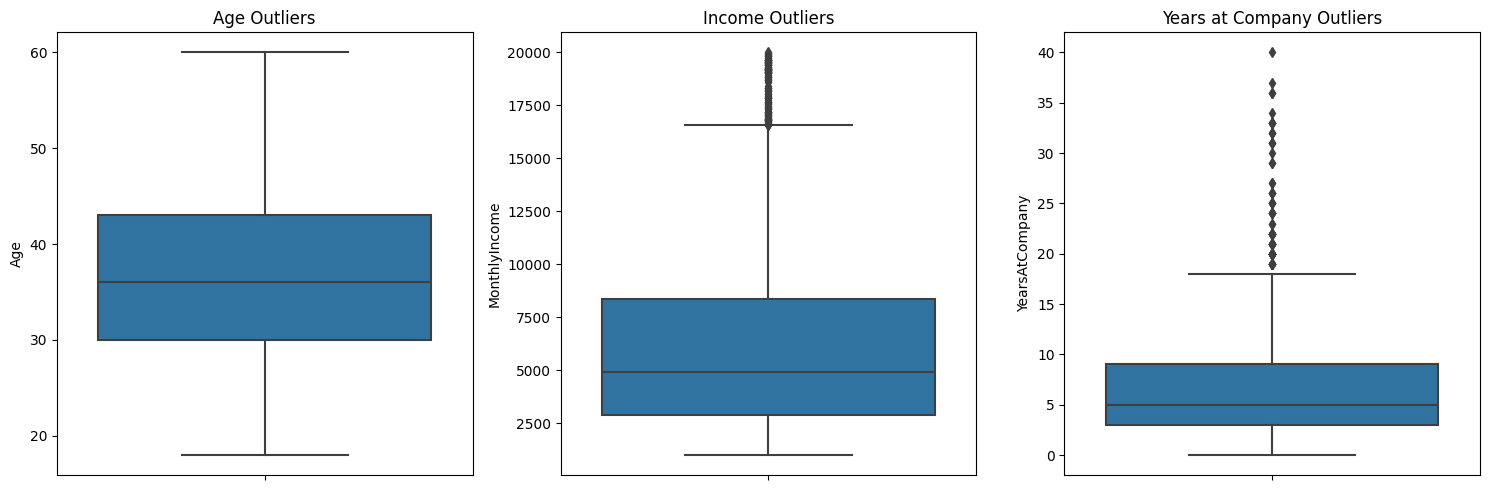

In [18]:
#checking outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='Age', ax=axes[0])
sns.boxplot(data=df, y='MonthlyIncome', ax=axes[1])
sns.boxplot(data=df, y='YearsAtCompany', ax=axes[2])
axes[0].set_title('Age Outliers')
axes[1].set_title('Income Outliers')
axes[2].set_title('Years at Company Outliers')
plt.tight_layout()
plt.show()

Step 3 - Probability and Statistical Analysis

In [19]:
#calculating probabilities
leaving_prob = df['Attrition'].value_counts(normalize=True)[1]
print("Attrition probability: ",round(leaving_prob,2))

Attrition probability:  0.16


In [20]:
dept_attr = df[df['Attrition'] == 1]['Department'].value_counts() / df['Department'].value_counts()
print("Probability of emp leaving based on department :\n",round(dept_attr,2))

Probability of emp leaving based on department :
 Department
1    0.14
0    0.21
2    0.19
Name: count, dtype: float64


In [21]:
perf_attr = df[df['Attrition'] == 1]['PerformanceRating'].value_counts() / df['PerformanceRating'].value_counts()
print("Probability of emp leaving based on performance :\n",round(perf_attr,2))

Probability of emp leaving based on performance :
 PerformanceRating
3    0.16
4    0.16
Name: count, dtype: float64


In [22]:
#Naive Bayes
P_A = leaving_prob
P_B_A = len(df[(df['Attrition'] == 1) & (df['PerformanceRating'] == 3)]) / len(df[df['Attrition'] == 1])
P_B = len(df[df['PerformanceRating'] == 3]) / len(df)

In [23]:
P_A_B = (P_B_A*P_A) / P_B
print('Probability of A given B :',P_A_B)

Probability of A given B : 0.16077170418006428


In [24]:
# Hypothesis testing
from scipy.stats import f_oneway
sl = df[df['Department'] == 0]['PerformanceRating']
rd = df[df['Department'] == 1]['PerformanceRating']
hr = df[df['Department'] == 2]['PerformanceRating']
f_stat , p_val = f_oneway(sl,rd,hr)

In [25]:
print('F-statistics : ',f_stat ,"\n",'P_value: ',p_val)

F-statistics :  0.7940044059801676 
 P_value:  0.4522252122566278


In [26]:
if p_val < 0.05:
    print('Significance difference in performance across department')
else:
    print('No significance')

No significance


# Phase 2 - Predictive Modeling

Step 4 - Feature Engineering and Encoding

In [27]:
# scaling and label encoding
from sklearn.preprocessing import StandardScaler, LabelEncoder

ss = StandardScaler()
df['MonthlyIncome'] = ss.fit_transform(df[['MonthlyIncome']])

In [28]:
df['PerformanceRating'] = ss.fit_transform(df[['PerformanceRating']])

In [29]:
df_enc = df.copy()
cat_col = df_enc.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_col:
    df_enc[col] = le.fit_transform(df_enc[col])

In [30]:
#importnig libs 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [31]:
X = df_enc.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, errors='ignore')
y = df_enc['Attrition']

In [32]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [33]:
#fitting model
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
#predicting values
y_pred = rfc.predict(X_test)

In [38]:
#Accuracy, precision, recall, F1-score
print("Accuracy is :",accuracy_score(y_test,y_pred)*100,'%')

Accuracy is : 82.99319727891157 %


In [37]:
print('Classification Report: \n', classification_report(y_test,y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.90       236
           1       0.83      0.17      0.29        58

    accuracy                           0.83       294
   macro avg       0.83      0.58      0.59       294
weighted avg       0.83      0.83      0.78       294



<Axes: >

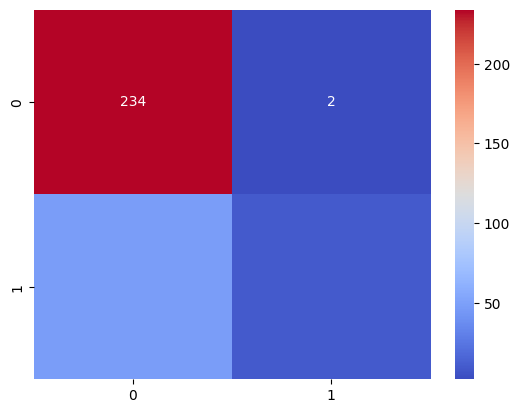

In [39]:
#confusion matrix
con_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(con_mat,annot=True,cmap='coolwarm',fmt='d')

In [40]:
con_mat

array([[234,   2],
       [ 48,  10]], dtype=int64)

Step 6 - Employee Performance Prediction Model

In [41]:
#importing libs

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X = X.copy()

In [43]:
y = df['PerformanceRating']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [45]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)

In [46]:
#R²,  MSE
print("MSE :",mean_squared_error(y_test,y_pred))

MSE : 0.8547344788230311


In [47]:
print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  -0.11600357744907552


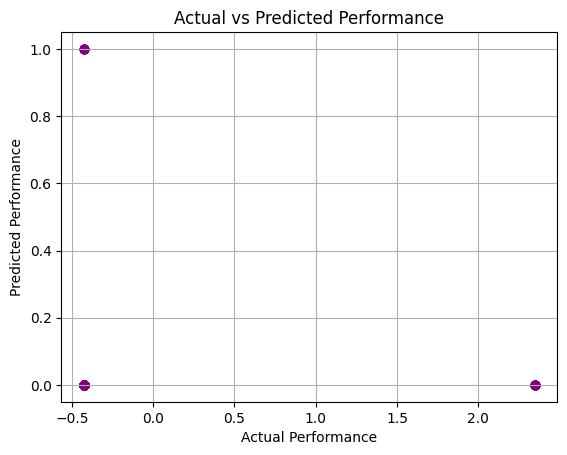

In [48]:
#Predicted vs Actual plot
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.grid(True)
plt.show()

This is happening because in performance rating column in our dataset it only contains two values i.e 3 and 4 because of which our r2_score is 1. 
Thus this problem is a classification problem and not a Regression 

If we solved it using classification then

In [51]:
#therefore using randomfroestclassifier
bins = [0, 2.5, 3.5, 5]
labels = ['Low', 'Medium', 'High']
df['Performance_Class'] = pd.cut(df['PerformanceRating'], bins=bins, labels=labels)

df['Performance_Class'] = le.fit_transform(df['Performance_Class'])

In [52]:
X = df.drop(['PerformanceRating','BusinessTravel','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'], axis=1)
y = df['Performance_Class']


In [53]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
clf = RandomForestClassifier()
clf.fit(X_train_cl, y_train_cl)
y_pred = clf.predict(X_test_cl)

In [73]:
print("Accuracy score:",accuracy_score(y_test_cl,y_pred))

Accuracy score: 1.0


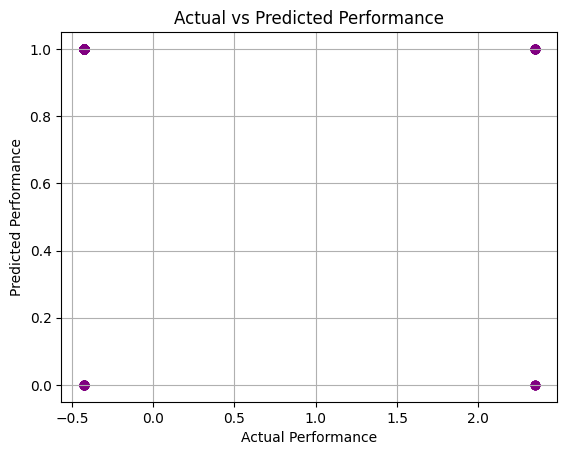

In [55]:
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual vs Predicted Performance")
plt.grid(True)
plt.show()

# Phase 3 - Deep Learning Models

Step 7 - Deep Learning for Employee Performance Prediction

In [56]:
#importing libs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [57]:
X_dl = df_enc.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours','PerformanceRating'], axis=1, errors='ignore')
y_dl = df_enc['PerformanceRating']

In [58]:
#scaling
X_dl = ss.fit_transform(X_dl)

In [59]:
X_train,x_test,Y_train,y_test = train_test_split(X_dl,y_dl,test_size =0.2,random_state = 42)

In [60]:
#deep learning model
model = Sequential([
    Dense(32 , activation= 'relu',input_shape = (X_train.shape[1],)),
    Dense(16, activation ='relu'),
    Dense(1)
])


C:\Users\Bhushan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
model.compile(optimizer ='adam',loss='mse',metrics=['mae'])

In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 1,505 (5.88 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
#training the model
hist = model.fit(X_train,Y_train,epochs =50,batch_size =16,validation_split=0.2)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.0437 - mae: 0.7575 - val_loss: 0.7602 - val_mae: 0.6411
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7920 - mae: 0.6607 - val_loss: 0.6101 - val_mae: 0.5715
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5919 - mae: 0.5691 - val_loss: 0.5128 - val_mae: 0.5353
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4100 - mae: 0.4728 - val_loss: 0.4582 - val_mae: 0.5078
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3708 - mae: 0.4484 - val_loss: 0.4197 - val_mae: 0.4859
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3538 - mae: 0.4311 - val_loss: 0.3821 - val_mae: 0.4583
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2671 - mae: 0.3779 - val_loss: 0.3617 - val_mae: 0.4354
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2544 - mae: 0.3623 - val_loss: 0.3418 - val_mae: 0.4191
Epoch 9/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2236 - mae: 

In [64]:
# loss,mae
loss, mae = model.evaluate(x_test,y_test)
print("Mean Absolute error: ",mae)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2186 - mae: 0.2794 
Mean Absolute error:  0.28278422355651855


Step 8 - Employee Attrition Analysis with Deep Learning

In [65]:
X = df_enc.drop(['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, errors='ignore')
y = df_enc['Attrition']

In [66]:
X_train,x_test,Y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 42)

In [67]:
model = Sequential([
    Dense(32 , activation= 'relu',input_shape = (X_train.shape[1],)),
    Dense(16, activation ='relu'),
    Dense(1,activation ='sigmoid')
])


C:\Users\Bhushan\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [68]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
#training the model
history = model.fit(X_train,Y_train,epochs =50,batch_size =16,validation_split=0.2)

Epoch 1/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2324 - loss: 2091.2175 - val_accuracy: 0.7966 - val_loss: 96.9494
Epoch 2/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7511 - loss: 50.7159 - val_accuracy: 0.7288 - val_loss: 7.9964
Epoch 3/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6730 - loss: 4.4343 - val_accuracy: 0.7924 - val_loss: 2.4054
Epoch 4/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 1.8684 - val_accuracy: 0.7966 - val_loss: 12.1454
Epoch 5/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7511 - loss: 5.1585 - val_accuracy: 0.8008 - val_loss: 4.2865
Epoch 6/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7485 - loss: 3.1525 - val_accuracy: 0.4873 - val_loss: 2.2360
Epoch 7/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 1.3319 - val_accuracy: 0.8008 - val_loss: 4.1254
Epoch 8/50
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss: 2.9143 - val_accuracy: 0.7966 - val

In [71]:
#loss and accuracy
loss, acc = model.evaluate(x_test,y_test)
print("Accuracy is: ",acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2733 - loss: 5.7970 
Accuracy is:  0.25170066952705383


# Phase 4 - Reporting and Insights


 Visualiztion

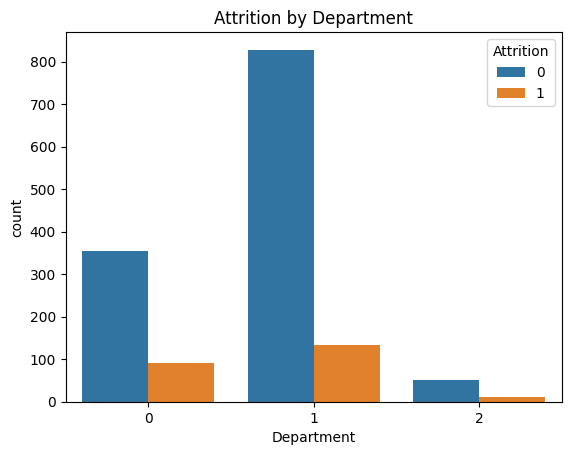

In [73]:
#count of emp leaving from each department
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')

plt.show()

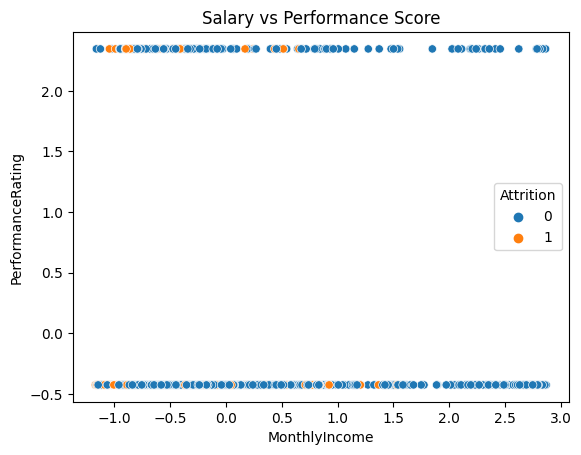

In [74]:
# scatterplot for salary vs performace
sns.scatterplot(x='MonthlyIncome', y='PerformanceRating', hue='Attrition', data=df)
plt.title('Salary vs Performance Score')
plt.show()

 Insights

# Conclusion